In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['font.family'] = 'SimHei'

In [77]:
df = pd.read_excel('./data/data_train.xlsx')
df.sample(10)

,情感,语句,来源
131299,抱怨,车大灯照明效果不给力，中控的小红屏很不爽啊。,开源数据集
41461,辱骂,对，自己家那么有钱还在乎那么点押金，还有怕带坏自己女朋友就杀人的，呵呵，说的自己是什么好东西...,COLDataset
127834,抱怨,没有标配倒车影像，没有后视镜加热这两样实用的功能很无奈！城区限行皮卡，最不安逸。,开源数据集
91917,表扬,最满意的地方就是空间比较大，乘坐比较舒适，配置很高,开源数据集
111399,表扬,使用过程中，满意的地方就是，跑长途驾驶员不会太累，空间大，随乘人员不会显得太挤，车辆行驶过程...,开源数据集
42693,中性,费雯丽，童年女神,COLDataset
47889,辱骂,身为浙江人说下，去年家里停过两次，一次有五六小时左右，一次大约二小时，具体为一次是线路改造，...,COLDataset
75970,表扬,满意外观,开源数据集
54550,辱骂,就好比一个黑人跟你比赛之前说中国疫情怎么样 难道还要看你赢不赢才回击他么 我相信你会直接骂他...,COLDataset
117129,表扬,油耗低，舒适性好，空间大。,开源数据集


In [78]:
print(f'样本数:{df.shape}')

样本数:(142834, 3)


类别：
抱怨    37153
表扬    35101
投诉    30508
中性    21881
辱骂    18191
Name: 情感, dtype: int64


Text(0.5, 1.0, '类别分布')

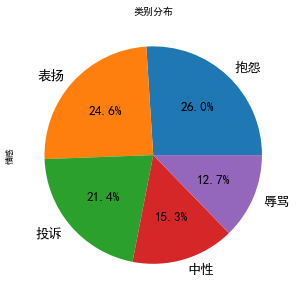

In [83]:
print(f"类别：\n{df['情感'].value_counts()}")

plt.figure(figsize = (6, 6), dpi = 60)
df['情感'].value_counts().plot.pie(autopct = '%1.1f%%', textprops = {'fontsize': 16}).set_title('类别分布')

In [84]:
print(f"缺失值分布：\n {df['语句'].isna().sum()}")

缺失值分布：
 3


In [85]:
df[df['语句'].isna()]

,情感,语句,来源
36723,中性,NaN,COLDataset
52766,辱骂,NaN,COLDataset
62669,辱骂,NaN,COLDataset


In [86]:
df = df.dropna()
print(f"缺失值分布：\n {df['语句'].isna().sum()}")

缺失值分布：
 0


In [87]:
print(f"重复值：\n {df['语句'].duplicated().sum()}，比例：{np.round(100 * df['语句'].duplicated().sum() / len(df), 3)}%")

重复值：
 10743，比例：7.521%


In [88]:
df[df['语句'].duplicated() == True]['语句']  # 好奇怪？为啥会重复？

88                      价格要是能再低点就更好了！京东应该多搞特价活动!快递的服务态度不是很好
134          国产代工，电池部分设计不合理，装上电池后，与键盘平行的那一面有一点点高起来，有可能与屏接触。
194       我在买之前就看到很多人说装系统麻烦，果然不只一点点烦啊，一开始硬盘没找到。。。找了半天，不过...
262       六心电池装在后面突出一大块影响美观，速度慢机器有点卡，放歌一停顿一停顿，重量比一般的上网本重...
274       发热是普遍的，不过从07年我就开始使用的6515b的情况看，这个热是没有带来任何问题的，你不...
                                ...                        
142042                      动力稍稍有点不足，油耗有点小高，不知道是不是我不太会开的缘故。
142048    感觉北汽幻速车噪音还是有点的，不过慢慢习惯了就好了，特别是车子起步时候，踩上油门时候有明显感...
142056    最不满意的就是车子的动力还是有点不那么够用，一般家用的话应该是可以了，主要我是用来拉客偶尔也...
142179    虽然我是新手，但是油耗对于1.5l排量的车确实高，百公里差不多9个油，还有就是挂2档的时候，...
142552                                                 暂时没有
Name: 语句, Length: 10743, dtype: object

In [89]:
df.nunique()

情感         5
语句    132088
来源         4
dtype: int64